# Final Project: Analysis of Stock Data

In this exercise, we will guide you through some interesting analysis of some serious financial data. The data is downloaded from [Yahoo! Finance](finance.yahoo.com), and is stored in the file <code>StockData.csv</code>. The first few rows and columns of the file look like the following:

<code>
Ticker            AA       AIN       APD       ARG       ASH       ATR  
Sector         basic     basic     basic     basic     basic     basic   
Date                                                                     
1993-08-25  0.590414 -0.009401  0.739729 -0.019292  1.435410 -0.029553   
1993-08-26 -0.001707 -0.009401 -0.020755 -0.500459  0.833252 -0.029553   
1993-08-27 -0.593827  1.048624 -0.399649 -0.019292 -0.579771  1.441438   
1993-08-30 -0.001707 -0.009401  0.358138  0.461874  0.827995 -1.500544   
1993-08-31 -0.001707 -0.009401 -0.399649 -0.019292  1.085364  1.441438
</code>

The data represents the *daily* **stock return** from August of 1993 to July of 2013, that is, twenty years (!). Stock return is basically the difference between the starting and closing prices of a stock for a transaction day: it is positive if the stock price increases during the day, and negative if it decreases. What further needs explanation are the first two rows. **Ticker** is the identifier of a stock (a finance jargon); for example, *AA* represents *Alcoa Inc.*, and *Apple Inc*. is identified by *AAPL*. **Sector** refers to *economic sector*, that is, the corresponding major area of an economy; in our dataset, there are 14 sectors: 

- basic
- capital
- cyclical
- energy
- fin (short for "finance")
- health
- miscservices (short for "miscellaneous services")
- noncyc (short for "non-cyclical")
- realestate
- retail
- tech
- telecom
- transport
- utils (short for "utilities")

As examples of stocks in the non-cyclical sector are *Procter & Gamble* and *Pepsi*.  *Target* and *Gap* are examples of stocks in the cyclical sector. To look up the company name for a given ticker, you can go to [this website](http://www.nasdaq.com/symbol/?Load=true). 

Categorizing a stock into one of these 14 sectors requires expert knowledge. One question, along the spirit of **unsupervised learning**, that people often ask is: *Can one uncover this structure by just looking into the data itself without resorting to experts*? After going through this exercise, you will have a better sense of the answer to the question. 

Note that **Tasks** as labeled below (four in total) require you to do some actual coding, and **Questions** as labeled below (four in total) require you to put down some verbal answers in words below the questions. 

## Data import and processing

"This talk of big picture is all very nice, but how do we proceed?" First things first, we need to get to a position where we can display anything with the data. 

**Task 1**: Import the data, and process it so that: 

- All the values are stored in a $p$-by-$n$ array called <span style="font-family:courier;">dat</span>, where $p$ is the number of dates and $n$ is the number of stocks. 
- All the tickers are stored in an array called <span style="font-family:courier;">tickers</span>.  
- All the sectors are stored in an array called <span style="font-family:courier;">sectors</span>. 

Hints: 
- If you know <span style="font-family:courier;">pandas</span>, some operations here become simpler, and you can use <span style="font-family:courier;">pandas.DataFrame</span> in place of 2d arrays, and <span style="font-family:courier;">pandas.Series</span> in place of 1d arrays; but if you do not, standard Python combined with <span style="font-family:courier;">numpy</span> would still do the job (in this case it is recommended you pick up some <code>pandas</code> down the road as it is rather useful).
- Given the size of the data set, you may want to avoid using for-loops and use something smarter such as [<code>numpy.genfromtxt</code>](http://stackoverflow.com/questions/3518778/how-to-read-csv-into-record-array-in-numpy) or [<code>pandas.read_csv</code>](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). 
- The solution to HW5's Iris data import might be helpful. 

In [1]:
%matplotlib inline
# turn on this flag would make the plots look better, but
# would consume much memory and slow things down
#%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
line= pd.DataFrame.from_csv('StockData.csv',header=None)
temp = line[3:]

dat = temp[line.columns[0:]]
dat = dat.astype(float)
tickers = line.values[0,:]
sectors = line.values[1,:]
low_memory=False

Next, compute the **cumulative sum** of <span style="font-family:courier;">dat</span> over time (assuming the starting price on the first day of 1993-08-25 is zero for all stocks), so that the values now represent **stock prices** on that day, as opposed to returns. Store it in a new array, <span style="font-family:courier;">cdat</span>. 

Hints: 
- Use the <span style="font-family:courier;">numpy</span> or <span style="font-family:courier;">pandas</span> built-in function, <span style="font-family:courier;">cumsum</span>. 

In [4]:
# Before computing the cumulative sum
dat.values[:10,:3]

array([[ 0.59041352, -0.0094013 ,  0.7397288 ],
       [-0.00170694, -0.0094013 , -0.02075533],
       [-0.5938274 ,  1.04862387, -0.39964901],
       [-0.00170694, -0.0094013 ,  0.35813835],
       [-0.00170694, -0.0094013 , -0.39964901],
       [-0.00170694, -0.0094013 , -1.56368864],
       [-1.21377861, -0.35913324, -0.02075533],
       [ 0.60906375, -0.0094013 ,  0.3691608 ],
       [-0.61247762, -0.3620599 , -1.19911556],
       [-0.62225037, -0.36503595, -0.02075533]])

In [5]:
# After computing the cumulative sum
cdat=np.cumsum(dat,axis=0) 
cdat.values[:10,:3]

array([[ 0.59041352, -0.0094013 ,  0.7397288 ],
       [ 0.58870659, -0.01880261,  0.71897347],
       [-0.00512081,  1.02982127,  0.31932446],
       [-0.00682775,  1.02041997,  0.67746281],
       [-0.00853469,  1.01101866,  0.2778138 ],
       [-0.01024163,  1.00161736, -1.28587483],
       [-1.22402024,  0.64248413, -1.30663016],
       [-0.61495649,  0.63308282, -0.93746936],
       [-1.22743411,  0.27102293, -2.13658492],
       [-1.84968448, -0.09401303, -2.15734025]])

## Plot 

With the data now ready for analysis, what do we do? What's the first thing that jumps to a data scientist's mind? Yes, let's plot it! 

**Task 2**: Generate 14 plots for <code>cdat</code> such that:

- *Each plot represents a sector*, with the time series of all the stocks in that sector over the 20 years. 
- A few years are labeled at the ticks of the x-axis, similar to the following exemplary plot, to facilitate interpreting the plots.

Hints:

- Here is a place where a python function, say, <code>plot_dat</code>, would come in handy: it takes in a data set like our <code>dat</code>, and plots all the time series in it, *with the ticks of the x-axis properly labeled*. It'd be nice if the function could also take in other arguments, such as title, so that we can label the plots with the corresponding sectors. 
- Then the task becomes retrieving a subset of <code>dat</code> (that is, a subset of columns), and feeding the "sub <code>dat</code>" to <code>plot_dat</code>. 
- Here is a neat way of getting the subset of an array according to the values. Say, we want to get the indices of the entries of an array where the entries have a value of 1: 
    + <code>arr = np.array([1,2,1,1])</code> 
    + <code>idxs = np.where(arr==1)[0]</code> <br>
    (Hence it is nice to have <code>sectors</code> in arrays.)
- There are actually many curves in the whole blot - so many that you can't see individual curves. If your plots show individual curves, that's nice and go for it. 

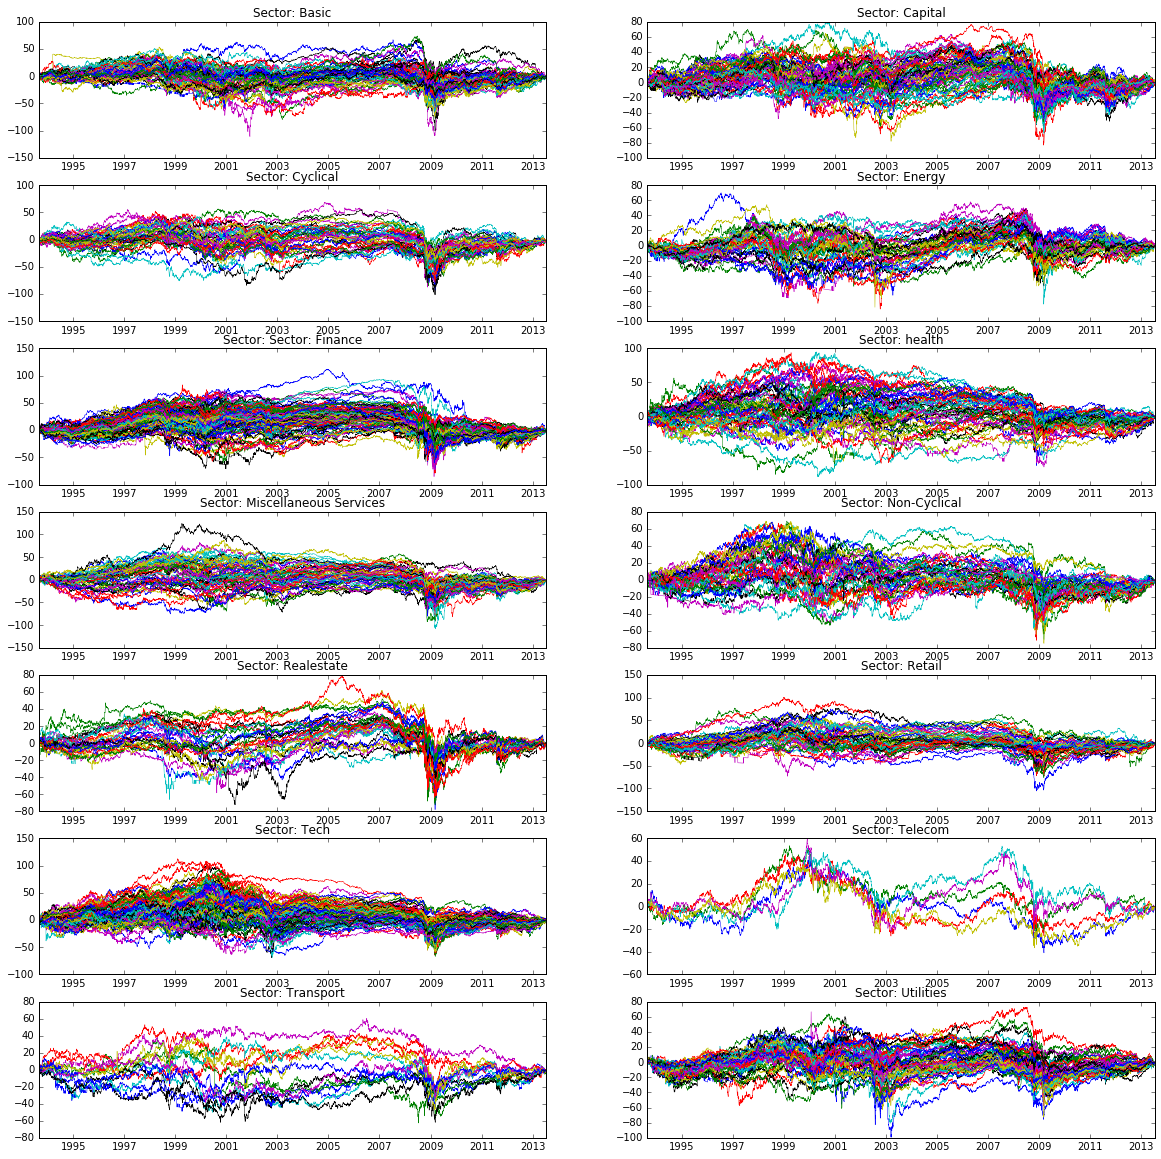

In [8]:
#plot_dat(cdat.iloc[:,:100], title='The First 100 Stocks')  # plot the first 100 stocks
stock = pd.read_csv('StockData.csv',header=None)[3:] # extract the return of stock
year = pd.to_datetime(stock[stock.columns[0]]) # extract year from stock data 

fig = plt.figure(figsize=(20,20))
# define a function from plot
def plot_dat(sector,title,i,j,k):
    pl = fig.add_subplot(i,j,k)
    position = np.where(sectors==sector)[0]
    pl.plot(year,cdat.iloc[:,position],linewidth=0.5)
    pl.set_title(title) 

plot_dat('basic','Sector: Basic',7,2,1)
plot_dat('capital','Sector: Capital',7,2,2)
plot_dat('cyclical','Sector: Cyclical',7,2,3)
plot_dat('energy','Sector: Energy',7,2,4)
plot_dat('fin','Sector: Sector: Finance',7,2,5)
plot_dat('health','Sector: health',7,2,6)
plot_dat('miscservices','Sector: Miscellaneous Services',7,2,7)
plot_dat('noncyc','Sector: Non-Cyclical',7,2,8)
plot_dat('realestate','Sector: Realestate',7,2,9)
plot_dat('retail','Sector: Retail',7,2,10)
plot_dat('tech','Sector: Tech',7,2,11)
plot_dat('telecom','Sector: Telecom',7,2,12)
plot_dat('transport','Sector: Transport',7,2,13)
plot_dat('utils','Sector: Utilities',7,2,14)

In [39]:
'''
From the plots, we can see that there is a significant drop around 2009 for all sectros of stocks. 
We can also see that many sectors of stocks has a big drop such as utilities,energy around 2003
''' 

From the plots, we can see that there is a significant drop around 2009 for all sectros of stocks. We can also see that many sectors of s


**Question 1**: What stories do the plots tell? For example, what happened around 2008?

## Dimension reduction 

Plotting the data and coming up with some stories are... how to put it, more like a *journalist's*' job. We data scientists need to go beyond that. What is the next tool that is lined-up in our tool-kit? Raise your hands. I hear some of you shout "PCA!". Indeed. **PCA** is a tool that is used extremely often, by statisticians and non-statisticians alike, but also often used incorrectly and seems to be rarely fully understood. We, *the technical guys*, have to get it right. In a nutshell, PCA tries to find a **low-dimensional representation** of the data while keeping most of the "*information*".

If you understand PCA well, you will see that we are facing a challenge here: there are more dimensions than the number of data points in the data set, that is, $p>n$. PCA is designed for situations where $n>p$, but in fact $p>n$ happens quite often, especially in this confusing age of **Big Data**. Does that mean PCA is useless here?

Not quite. We can still use the idea of "low-dimensional representation". The idea is to reduce the **feature space** (that is, the space with all of the time series) from the 5000-dimensional space to a 2-dimensional plane (so that we can plot things out), in such a way that maximal amount of variation is kept in the reduction. Now imagine in this 5000-dimensional space, there are 705 points, representing the 705 stocks, that form a **data cloud**. (Can you imagine two points in a three-dimensional space? It's similar.) The cloud takes some shape, and if the shape is much longer in some directions than others, then those long directions can serve as the bases of the subspace onto which the cloud is **projected** and the shape is largely kept. 

How do we get these directions? The answer is **singular value decomposition** (**SVD**), a *close cousin* of PCA. The axes are encoded in the so-called **right singular vectors** (ie, the matrix <code>U</code> below). Provided below are some codes to help you:
- Perform SVD.
- Plot the projection.

For the curious minds, understanding the code would help you understand the useful ideas described above; for the less curious, you sort of still need to understand the code to accomplish Task 3 below anyway...

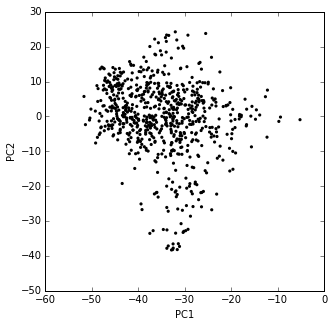

In [32]:
U, S, V = np.linalg.svd(dat)

def plot_svd(idx1, idx2):
    coords = np.dot(U[:,[idx1,idx2]].T, dat)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(*coords, c='k', s=10, edgecolor='none')
    ax.set_xlabel('PC%d'%(idx1+1))
    ax.set_ylabel('PC%d'%(idx2+1))
    plt.show()
    
plot_svd(0,1)

The above plot can be improved (significantly) in two ways: 
- As I said, each point represents a stock, and we know all the sector information of the stocks! Why not use it? Yes, for example, **color-coding** each point in such a way that different colors represent different sectors would make the plot much more interpretable.
- The two parameters of the function <code>plot_svd</code>, <code>idx1</code> and <code>idx2</code> represent the indices of the principal directions/axes in the $p$-space (the 5000-dimensional feature space), and the plot was generated using the first and second principal directions (with indices 0 and 1 respectively). Other principal directions should be checked to see whether they better describe the variation (sometimes they do). 

**Task 3**: Improve the function <code>plot_svd</code> so that the points are *color-coded*, and use it to plot the projection of the data on the subspace spanned by the *second* and the *third* principal directions. 

**Question 2**: Briefly describe your interpretation of the plot obtained in Task 3.

In [9]:
# From the left plot, we can see that yellow points are well separated with other points. 
# From the right plot, we can see that the yellow, red and orange points are well separated from each other.

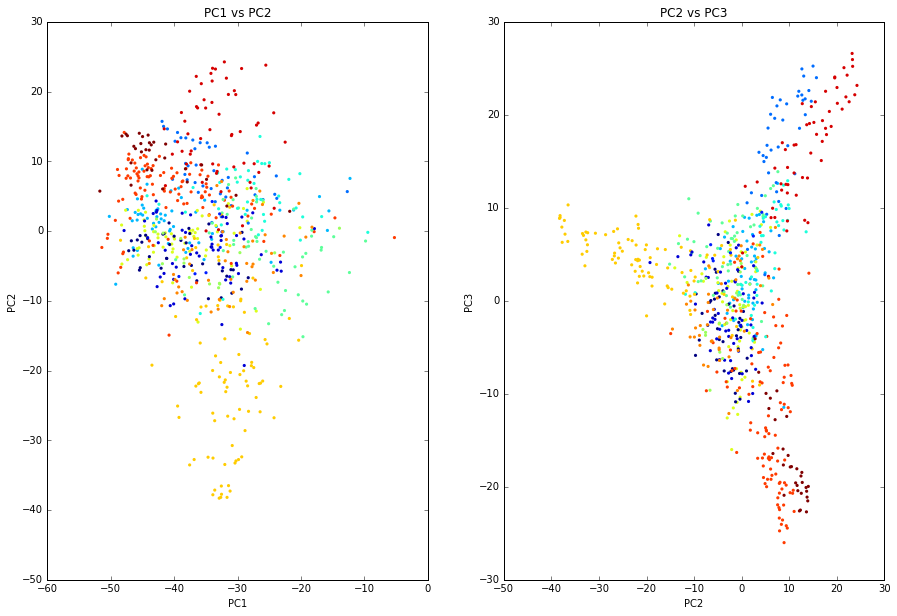

In [68]:
U, S, V = np.linalg.svd(dat)

col =  np.empty(705)

c_sector =0
for line in set(sectors):
    position = np.where(sectors==line)[0]
    c_sector = c_sector +1
    for row in position:
        col[row] = c_sector

fig = plt.figure(figsize=(15,10))
def plot_svd(idx1,idx2,title,i):
    coords = np.dot(U[:,[idx1,idx2]].T, dat)
    ax = fig.add_subplot(i)
    ax.scatter(*coords, c=col, s=10, edgecolor='none')
    ax.set_xlabel('PC%d'%(idx1+1))
    ax.set_ylabel('PC%d'%(idx2+1))
    ax.set_title(title)
        
plot_svd(0,1,'PC1 vs PC2',121)
plot_svd(1,2,'PC2 vs PC3',122)
# From the left plot, we can see that yellow points are well separated with other points. 
# From the right plot, we can see that the yellow, red and orange points are well separated from each other.

## Correlation matrix

Another tool in the tool-kit for our current purpose is to plot the **correlation matrix**. The idea is simple, and so are the codes, which again are given to you below with no expectation of you being quizzed on. 

Make sure you understand this *essential* fact: *if* the columns of the data matrix are arranged in such a way that neighboring columns are highly correlated to each other, then the correlation matrix will take a **block pattern**, with correlated columns (that is, stocks) forming some *bright blocks* (in both the +1 and -1 directions) in the plotted matrix.

In this way, a correlation matrix is often used in conjunction with [**hierarchical clustering**](https://en.wikipedia.org/wiki/Hierarchical_clustering) (which first aligns the closely correlated columns together), in a way illustrated [here](http://www.sthda.com/english/wiki/clarifying-distance-measures-unsupervised-machine-learning#visualizing-distance-matrices).  

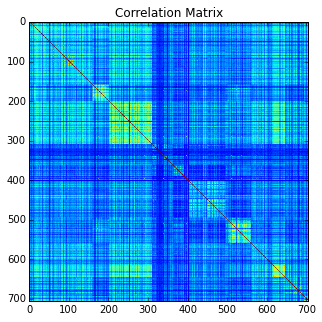

In [16]:
fig, ax = plt.subplots(figsize=(5,5))
corrs = dat.corr()
ax.imshow(corrs, cmap='jet')
plt.title('Correlation Matrix')
plt.show()

Having said this much, I am in fact tempted to nonetheless quiz you a bit as a sanity check that you are following along. 

**Question 3**: Would you say that there is a block pattern to the correlation matrix plotted above? What would the correlation matrix look like if I scrambled the columns and plotted it again?

In [70]:
'''
Yes, I can see block patterns to the correlation matrix plotted above. If the columns are scrambled and plot the correlation
matrix again, the block pattern will disappear.
'''

'\nYes, I can see block patterns to the correlation matrix plotted above. If the columns are scrambled and plot the correlation\nmatrix again, the block pattern will disappear.\n'

## K-means clustering

The last stop of our exploration is k-means clustering. You all know what it is, and how it is done (at least according to codes in packages). Aren't you curious to what the k-means algorithm would say about the data set? Will it be so wonderful and magical as to uncover all the hidden structure in the data set, to put to rest the unsupervised-learning grand quest that we put forward at the beginning? Let's find out. 

**Task 4**: Run the k-means algorithm on the data set, with the number of clusters set to be 14, our number of different sectors. Put your results not in the form of plots, but in the form of **14 dictionaries**, where *each dictionary corresponds to one cluster* returned by the k-means algorithm and gives *the count of different sectors in the cluster*. 

To help you understand what is asked for here, suppose hypothetically the k-means algorithm is indeed the golden egg that we are looking for -- it clusters the stocks perfectly according to our pre-assigned sectors -- what would the dictionaries look like in this case?

Let's say the first cluster corresponds to the "tech" sector. Then its dictionary would just be {'tech':93}, right? (There are 93 tech stocks in total.) Yes, for a *perfect* algorithm, each dictionary would have only one item, counting all the stocks for a given sector. 

On the other hand, if the algorithm is *crappy*, akin to, say, a monkey randomly typing on a keyboard to guess which sector a stock belongs to, then the dictionaries would all have many items, with each dictionary having roughly the same proportions of different sectors, right? Get the idea? Cool?

Hints:
- The data set is large, so it is recommended to use <code>k_means</code> from <code>sklearn</code>, where you can set the parameters <code>n_init</code> and <code>max_iter</code> (to be large enough so that many trials of the algorithm are done and the returned solution is unlikely to be a poor local optimum). The k-means algorithm implementation in <code>scipy</code> provides far less control. 
- The following Python type is convenient in counting:
    - <code>from collections import Counter</code>
    - <code>Counter(sectors)</code>

<code>
Counter({'basic': 58,
         'capital': 61,
         'cyclical': 41,
         'energy': 42,
         'fin': 107,
         'health': 53,
         'miscservices': 55,
         'noncyc': 40,
         'realestate': 31,
         'retail': 46,
         'tech': 93,
         'telecom': 6,
         'transport': 15,
         'utils': 57})
</code>

In [10]:
from collections import Counter
from sklearn.cluster import KMeans
km = KMeans(n_clusters=14,n_init=500,max_iter=500)
y_km = km.fit_predict(dat.T)

for i in range(14):
    index = np.where(y_km==i)[0]
    sec = sectors[index]
    print 'Cluster %d:'%(i+1),Counter(sec)

''' 
From the results of K-means clustering, we can see that for some of clusters, the performance is good which means the proportion
of the highest count sector is very high. However, for some clusters such as cluster 1 and cluster 14, the performance is very
bad which means the algorithm can't seperate one sector from other sectors.
'''

Cluster 1: Counter({'miscservices': 29, 'cyclical': 14, 'noncyc': 8, 'retail': 8, 'fin': 8, 'capital': 7, 'tech': 7, 'basic': 5, 'health': 4, 'utils': 3, 'transport': 2, 'energy': 1, 'realestate': 1})
Cluster 2: Counter({'utils': 48})
Cluster 3: Counter({'fin': 41, 'tech': 1, 'capital': 1})
Cluster 4: Counter({'realestate': 29, 'basic': 1})
Cluster 5: Counter({'retail': 31, 'cyclical': 7, 'miscservices': 4, 'noncyc': 1})
Cluster 6: Counter({'basic': 9, 'capital': 4, 'cyclical': 1, 'energy': 1, 'transport': 1})
Cluster 7: Counter({'capital': 12, 'cyclical': 1, 'realestate': 1})
Cluster 8: Counter({'health': 23, 'noncyc': 21, 'capital': 5, 'retail': 5, 'fin': 5, 'miscservices': 4, 'telecom': 4, 'tech': 2})
Cluster 9: Counter({'fin': 48})
Cluster 10: Counter({'tech': 61, 'miscservices': 1, 'capital': 1})
Cluster 11: Counter({'basic': 41, 'capital': 29, 'cyclical': 18, 'miscservices': 12, 'tech': 12, 'transport': 10, 'noncyc': 4, 'telecom': 2, 'health': 2, 'fin': 1})
Cluster 12: Counter({'

" \nFrom the results of K-means clustering, we can see that for some of clusters, the performance is good which means the proportion\nof the highest count sector is very high. However, for some clusters such as cluster 5 and cluster 12, the performance is very\nbad which means the algorithm can't seperate one sector from other sectors.\n"

**Question 4**: From the 14 dictionaries, what would be your evaluation of the performance of the k-means algorithm?

## Afterword

We have attempted a few nontrivial analyses on the data set - they are some of the most often used data mining tools! 

As concluding remarks, I'd like to share with you the status of the cutting edge research in the field. What are the smartest people in the business doing? How much fancier are their tools? The short answer is: *a bit, but not much*.

Here is a [recent paper](http://arxiv.org/abs/1503.06205) done by a local Cornell group on the same data set; in it they used a fancier algorithm (called Principal Convex Hull Analysis, which models the data set as a **convex set**, like high-dimensional triangles), and successfully uncovers *eight out of 14* of the sectors (they lie in the vertices of the high-dimensional triangles). That is, suppose the algorithm is used by an alien without any knowledge of humans' financial market: they would be able to say these several stocks constitute a sector, these several another, and so on. Pretty impressive. But our quick analysis was already able to say a bit in this direction, using SVD and k-means. 

Hope you enjoyed this exercise and even find some use of the tools in the future!